##**TASK1**

<u>**Data analysis Report:**</u>


> The project Predicting damage
during earthquake is made so that classification of grades can be done. The damage grade is divided into 3 categories,We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the Gorkha earthquake. There are 3 grades of the damage:
>
  * 1 represents low damage
  * 2 represents a medium amount of damage
  * 3 represents almost complete destruction


> Therefore by knowing grade of the damages, necessary precautions may be taken before earthquake.

Features:
The dataset mainly consists of information on the buildings' structure and their legal ownership
There are 39 columns in this dataset, of which the most important features are
* building_id column is a unique and random identifier.
* **geo_level_1_id**-this could represent the top-level geographical division, such as a country ,**geo_level_2_id**-This identifier may represent a sub-division within the geo_level_1 region. It could correspond to a state,
 **geo_level_3_id** : potentially representing a city.
  >* Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
* **count_floors_pre_eq** : number of floors in the building before the earthquake.
* **age**: age of the building in years.
* **land_surface_condition**: surface condition of the land where the building was built. Possible values: n, o, t.
* **roof_type** : type of roof used while building. Possible values: n, q, x.
* **foundation_type**: type of foundation used while building. Possible values: h, i, r, u, w.



##**TASK2**

**<u>Problem Statement:</u>**

Create a predictive model in such a way that the objective is to predict the ordinal variable “damage_grade”

Our goal is to predict the level of damage to building caused by 2015  Gorkha earthquake in nepal.

The data mainly consists for two files,
* train_values: this csv file contains the information on building structures and the legal ownership,each row represents building details in the region that is hit by the gorkha earthquake that happened in 2015
* train_labels: this csv file contains the information about the unique building id and damage_grade


###**Import libraries**

In [ ]:
#import the libraries
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [ ]:
from google.colab import drive

# This will prompt you to authorize Colab to access your Google Drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the csv file for train_values
file_path_train_values = '/content/drive/MyDrive/PRCP-1015-EquakeDamagePred/train_values.csv'

# Read the CSV file into a DataFrame
data_values = pd.read_csv('/train_values.csv')

In [ ]:
#Read the csv file for train_labels
file_path_train_labels = '/content/drive/MyDrive/PRCP-1015-EquakeDamagePred/train_labels.csv'

# Read the CSV file into a DataFrame
data_labels = pd.read_csv('/train_labels.csv')

In [ ]:
#load the data
pd.set_option("display.max_columns",None) #display all the columns
data_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


We have 39 columns in the above dataset  where
* building_id is unique id and random , this represents each building
*     geo_level_1_id: This might represent the top-level geographical division, such as a country or a region.
*   geo_level_2_id: This could represent a more detailed geographical subdivision within the level 1 region, like a state or province.
*  geo_level_3_id: This might represent an even more granular subdivision, such as a city or district.
* rest all of the columns describes the construction/building damaged due to the earthquake occured in the region, location, and the owner details,age of the costruction, height and materials used etc
* <font color=red>legal_ownership_status,count_families</font> features could be deleted, based on the accuracy


In [ ]:
#load the data
data_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


####**Basic checks**

In [ ]:
data_values.shape

(260601, 39)

In [ ]:
data_labels.shape

(260601, 2)

In [ ]:
# checking the info for data_values data types and memory usage
data_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [ ]:
#check for the null values
data_values.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

**Merge the two tables**

In [ ]:
# in this step we are merging the two data set for further Analysis
data=pd.merge(data_values,data_labels,on="building_id")

In [ ]:
data.head(3)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
# we are checking for statistics(mean and count) on the data.
pd.set_option('display.max_columns', None)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,260601.0,525675.482773,304544.999032,4.0,261190.0,525757.0,789762.0,1052934.0
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,260601.0,0.088645,0.284231,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,260601.0,0.761935,0.425900,0.0,1.0,1.0,1.0,1.0


In [ ]:
# statistics on categorical features
data.describe(include='O').T

,count,unique,top,freq
land_surface_condition,260601,3,t,216757
foundation_type,260601,5,r,219196
roof_type,260601,3,n,182842
ground_floor_type,260601,5,f,209619
other_floor_type,260601,4,q,165282
position,260601,4,s,202090
plan_configuration,260601,10,d,250072
legal_ownership_status,260601,4,v,250939


###**Exploratory Data Analysis**

Firstly we will be plotting the count and percentage of damage_grade

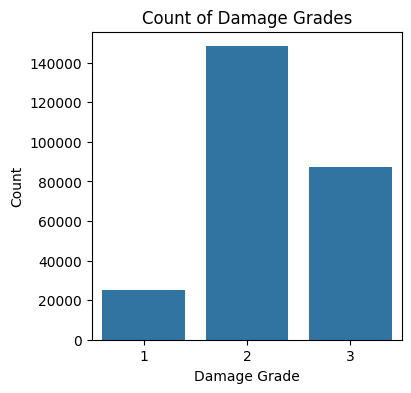

In [ ]:
plt.figure(figsize=(4,4))
# Create a countplot
sns.countplot(x='damage_grade', data=data)

# Add labels and title
plt.xlabel('Damage Grade')
plt.ylabel('Count')
plt.title('Count of Damage Grades')

# Show the plot
plt.show()

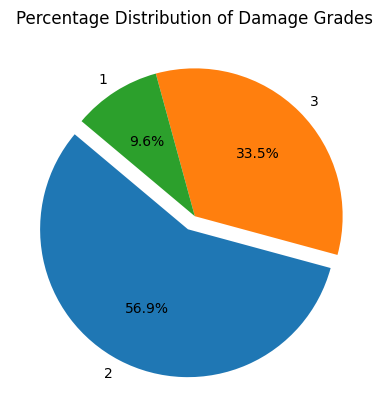

In [ ]:
# Calculate the percentage distribution
damage_counts = data["damage_grade"].value_counts()
labels = damage_counts.index
sizes = damage_counts.values
explode = (0.1, 0, 0)  # Explode the first slice (optional)

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)

# Add title
plt.title('Percentage Distribution of Damage Grades')

# Show the plot
plt.show()

It is concluded that 'damage_grade' of 2 is highest, followed by 'damage_grade' of 3

**Univariate Analysis**

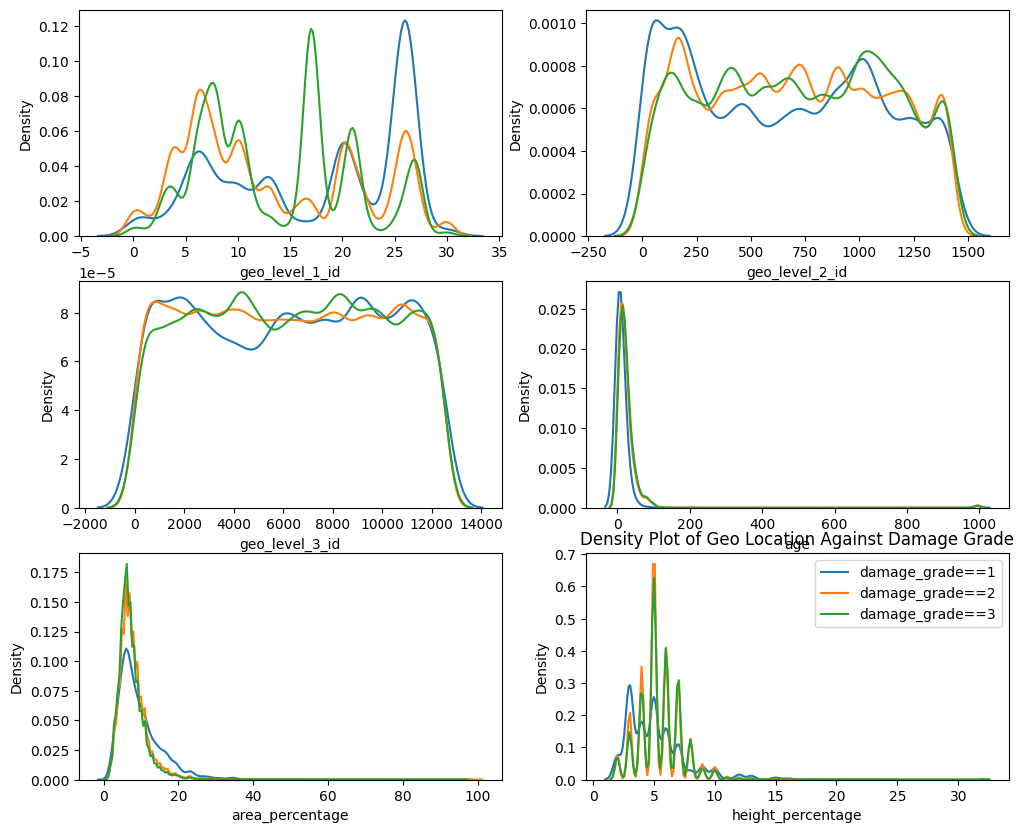

In [ ]:
# plot a density graph for few parameters which could impact the damage grade
data_density = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id','age','area_percentage','height_percentage']
damage_column = 'damage_grade'

# Create a scatter plot with transparency
fig=plt.figure(figsize=(12, 10))

for i,txt in enumerate(data_density):
  ax=fig.add_subplot(3,2,i+1)
  sns.kdeplot(data.loc[data['damage_grade']==1,txt], ax=ax, label='damage_grade==1')
  sns.kdeplot(data.loc[data['damage_grade']==2,txt], ax=ax, label='damage_grade==2')
  sns.kdeplot(data.loc[data['damage_grade']==3,txt], ax=ax, label='damage_grade==3')

plt.title('Density Plot of Geo Location Against Damage Grade')
plt.legend()
plt.show()

Looking at the above plots, it appears the geo_location 2 and 3 seems to have similar pattern , where as density is less for damage_grade==1

**Univariate Plot for numerical columns**

In [ ]:
num_data=data.select_dtypes(include=['int64','float64'])  # storing all the numerical data in num_data.
num_data=num_data[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage']]

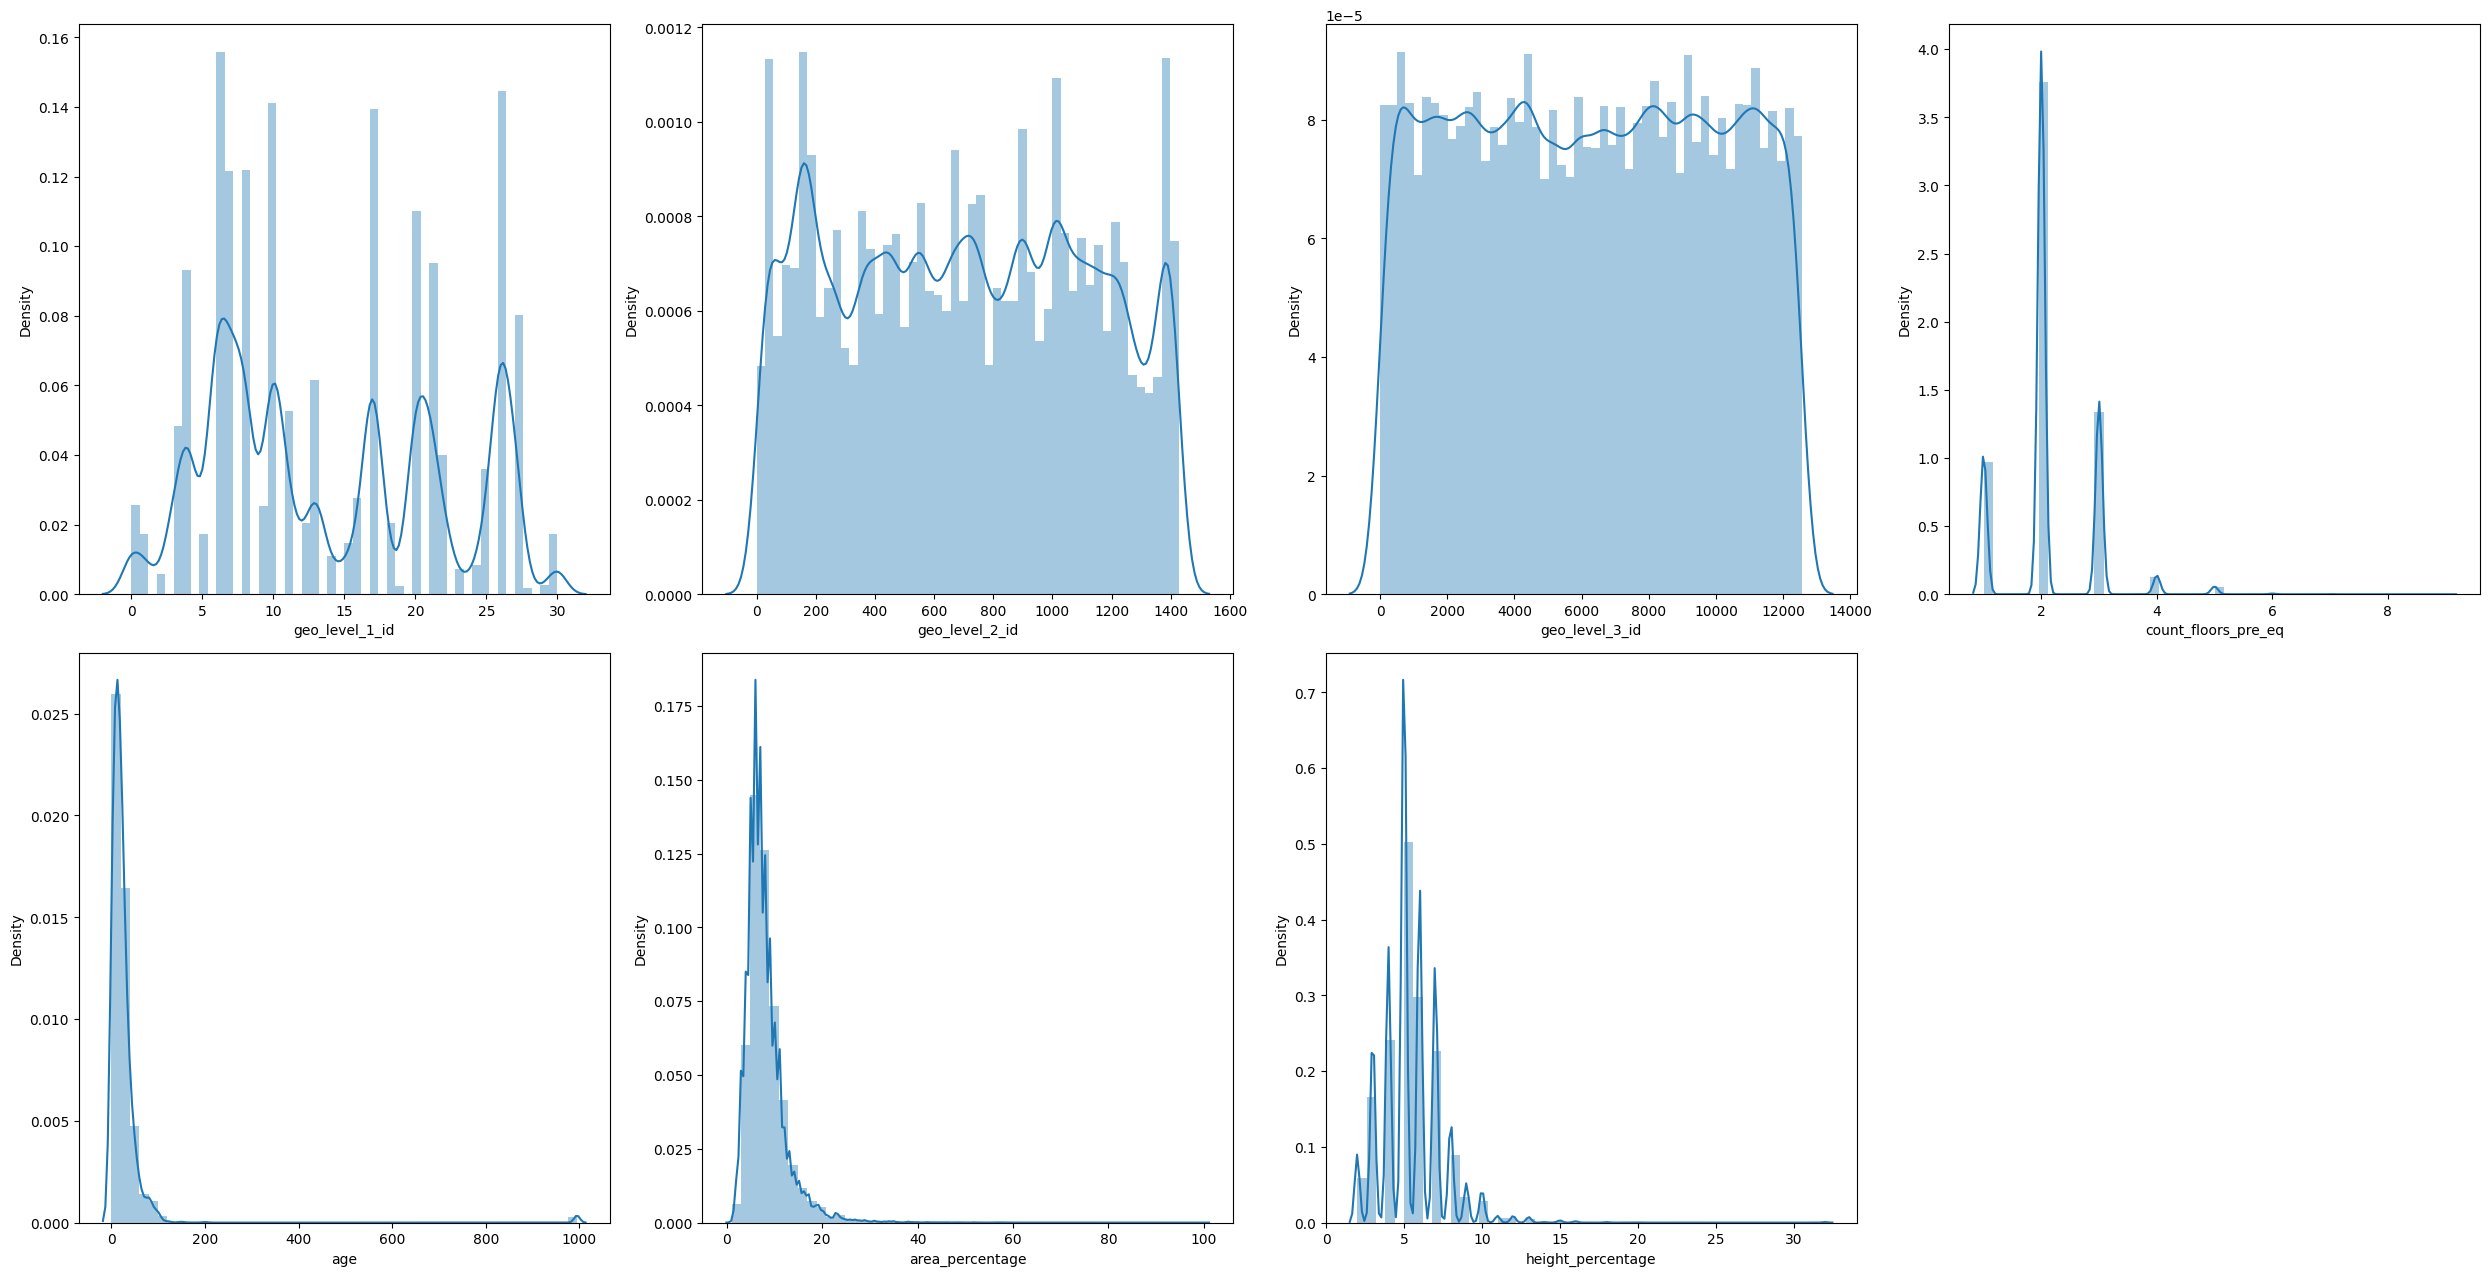

In [ ]:
# plotting histogram for numerical data
plt.figure(figsize=(25,25))
plot_num=1
for column in num_data:
    if plot_num<=35:
        ax=plt.subplot(4,4,plot_num)
        sns.distplot(x=num_data[column])
        plt.xlabel(column)
    plot_num+=1
plt.tight_layout()

Insights
* In the features geo_level_1_id, geo_level_2_id, geo_level_3_id the distribution of the data is not normally distributed.
* from the above graph we can see most of the buildings have the number of floors as two followed by three and one floors in the building.
* we have buildings with minimum age of 0 and maximum of 995 and most of the bulidings are in the age group of 0 to 30.
* The maximum buildings are in the area percentage of 0 to 15.
* The maximun height of the buildings is 32 and minimum height is 2.

**plotting graph for binary values**

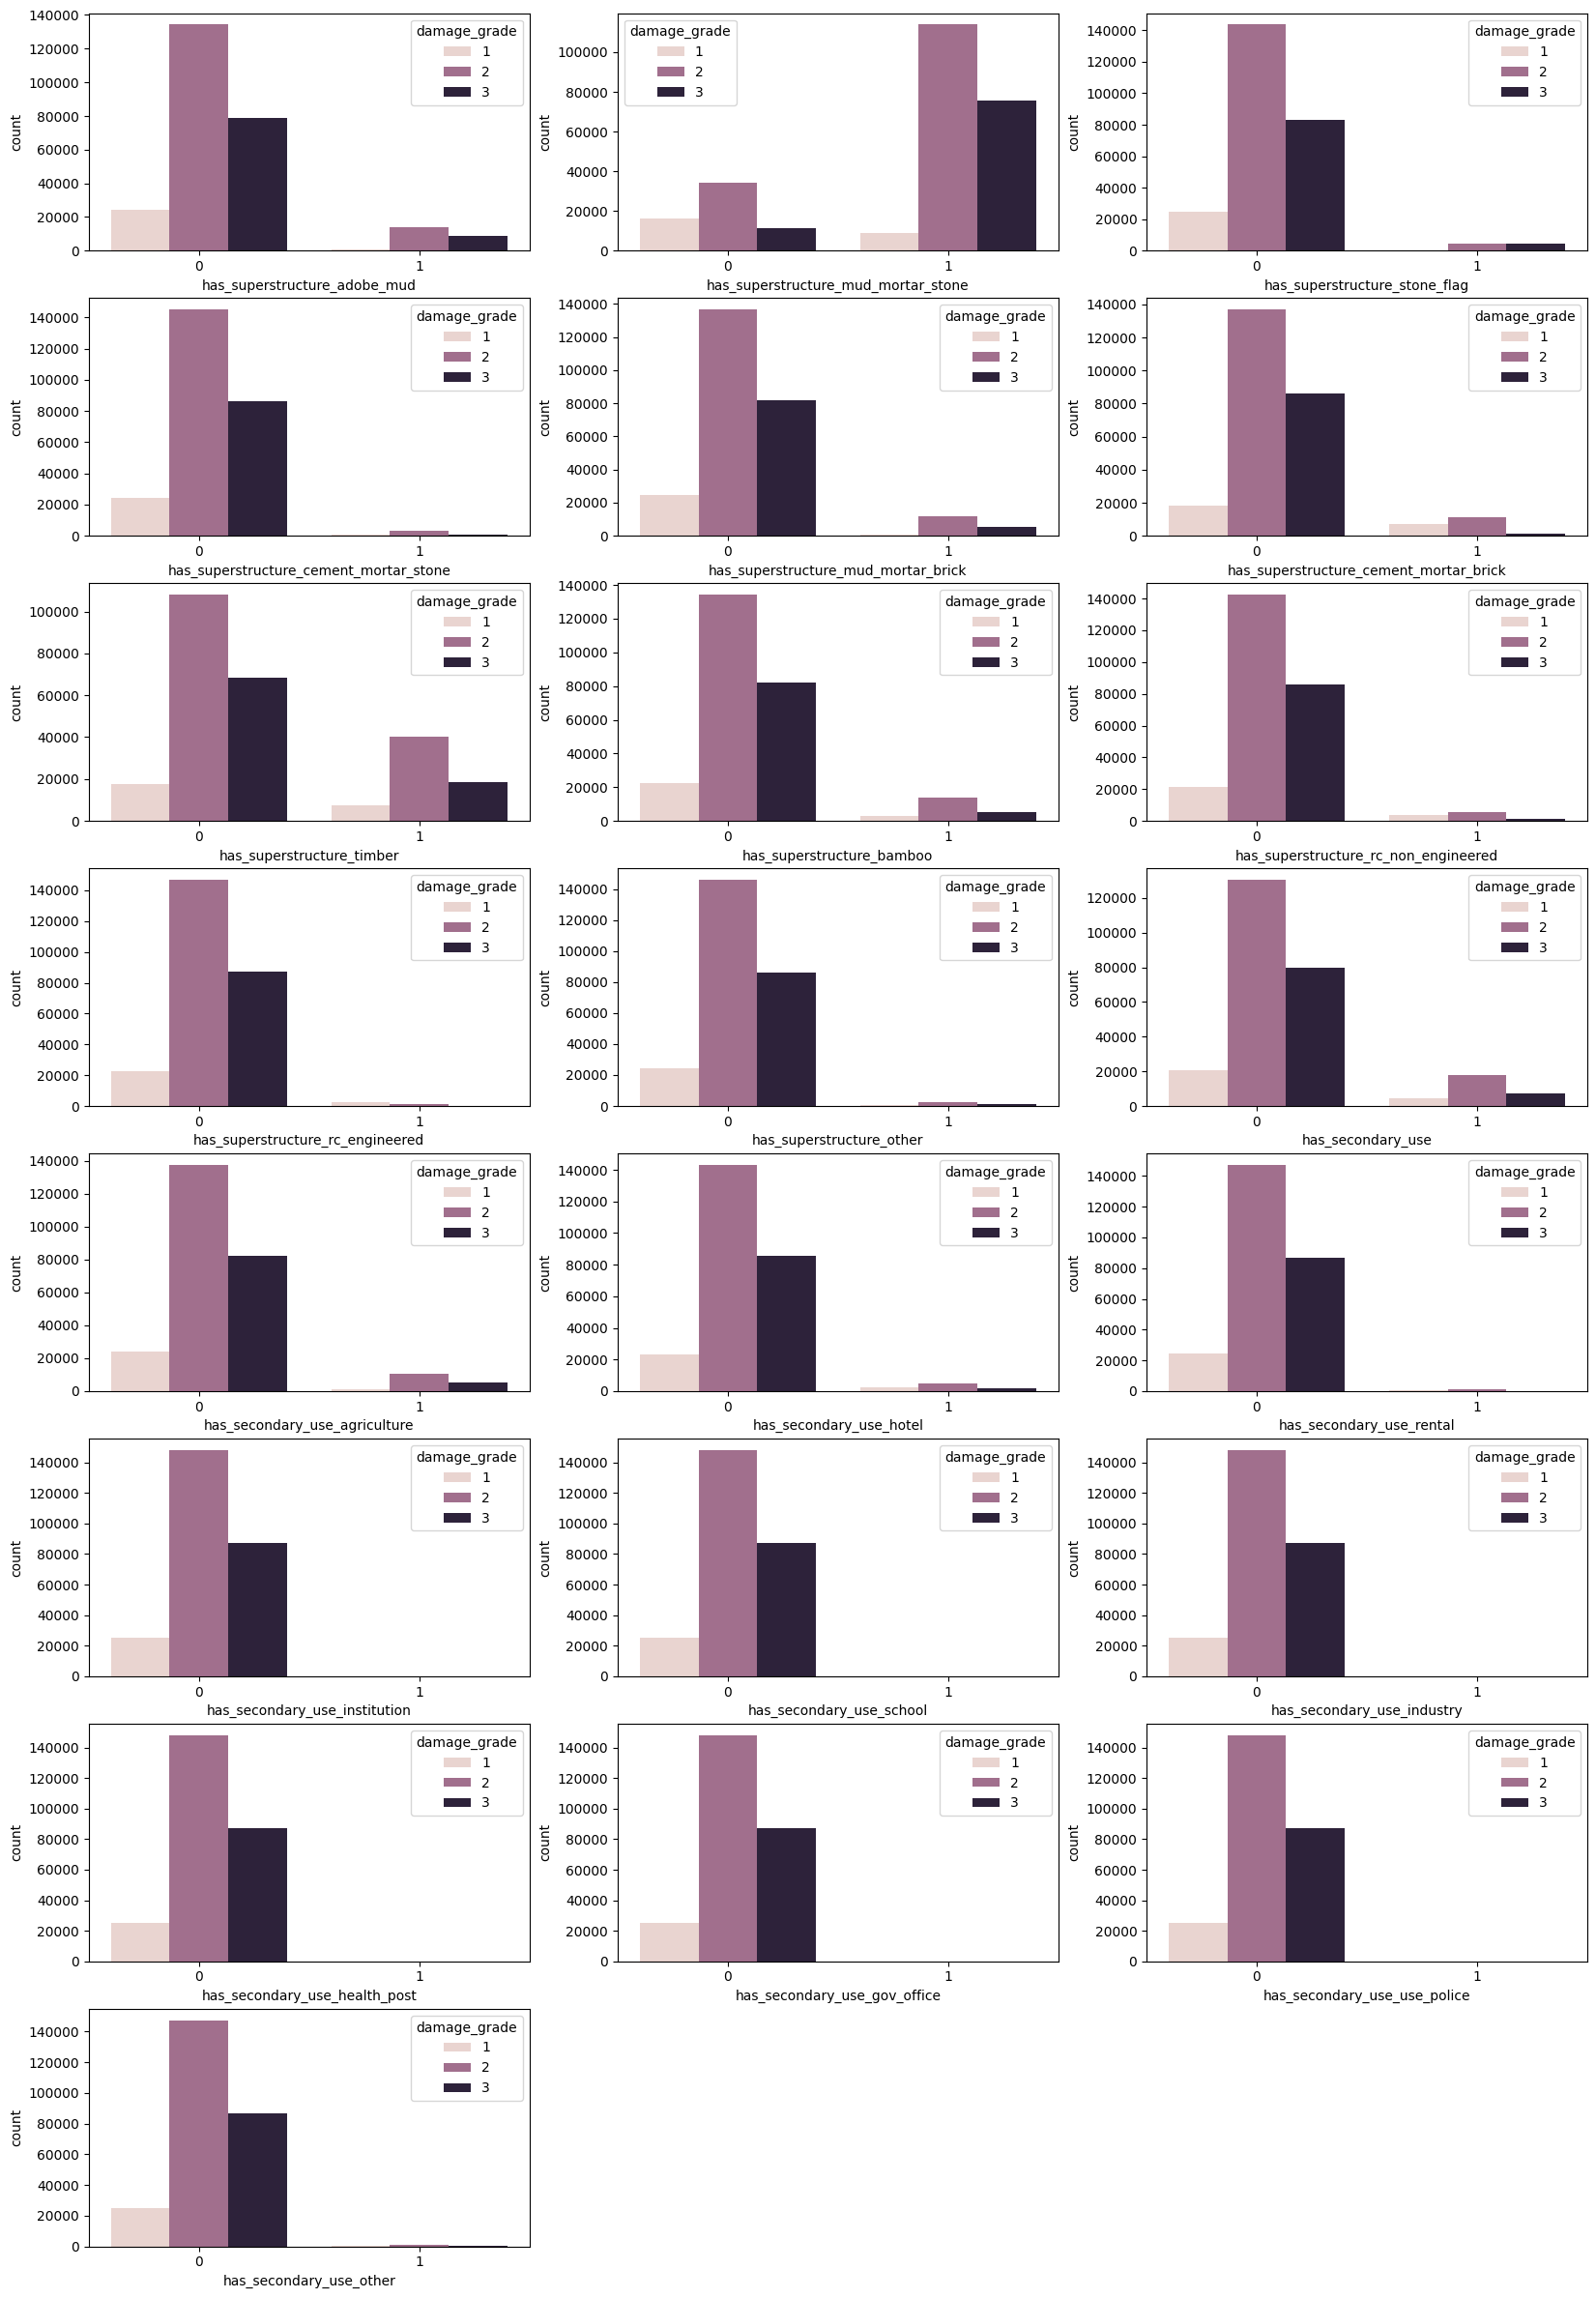

In [ ]:
  bin_cols=data_values.columns[data_values.columns.str.startswith('has')]

  fig=plt.figure(figsize=(20,30))
  for i,txt in enumerate(bin_cols):
    ax=fig.add_subplot(8,3,i+1)
    sns.countplot(x=data_values[txt],ax=ax,hue=data['damage_grade'])
  plt.show()


Looking into the above plots ,
* one of the graph has structure made up of mud motar stone has high level damage grade at all levels
* has_superstructure_timber: has mediam level of damage at all 3 grades
* has_superstructure_bamboo: usage of bamboo in construction has low level of damage
* rest other structures shows less damage caused when used

In [ ]:
bin_cols=data_values.columns[data_values.columns.str.startswith('has')]

for txt in bin_cols:
    value_counts=data[txt].value_counts()
    print(f"Value counts for {txt}:\n{value_counts}\n")
    print("-----------------------------------------------------------")


Value counts for has_superstructure_adobe_mud:
0    237500
1     23101
Name: has_superstructure_adobe_mud, dtype: int64

-----------------------------------------------------------
Value counts for has_superstructure_mud_mortar_stone:
1    198561
0     62040
Name: has_superstructure_mud_mortar_stone, dtype: int64

-----------------------------------------------------------
Value counts for has_superstructure_stone_flag:
0    251654
1      8947
Name: has_superstructure_stone_flag, dtype: int64

-----------------------------------------------------------
Value counts for has_superstructure_cement_mortar_stone:
0    255849
1      4752
Name: has_superstructure_cement_mortar_stone, dtype: int64

-----------------------------------------------------------
Value counts for has_superstructure_mud_mortar_brick:
0    242840
1     17761
Name: has_superstructure_mud_mortar_brick, dtype: int64

-----------------------------------------------------------
Value counts for has_superstructure_cement_mo

You can delete the columns whose binary value is way to less/ almost negligble "0" value is prediction
* has_secondary_use_other
* has_secondary_use_use_police
* has_secondary_use_gov_office
* has_secondary_use_health_post
* has_secondary_use_industry
* has_secondary_use_school
* has_secondary_use_institution

**count plot on Categorical columns**


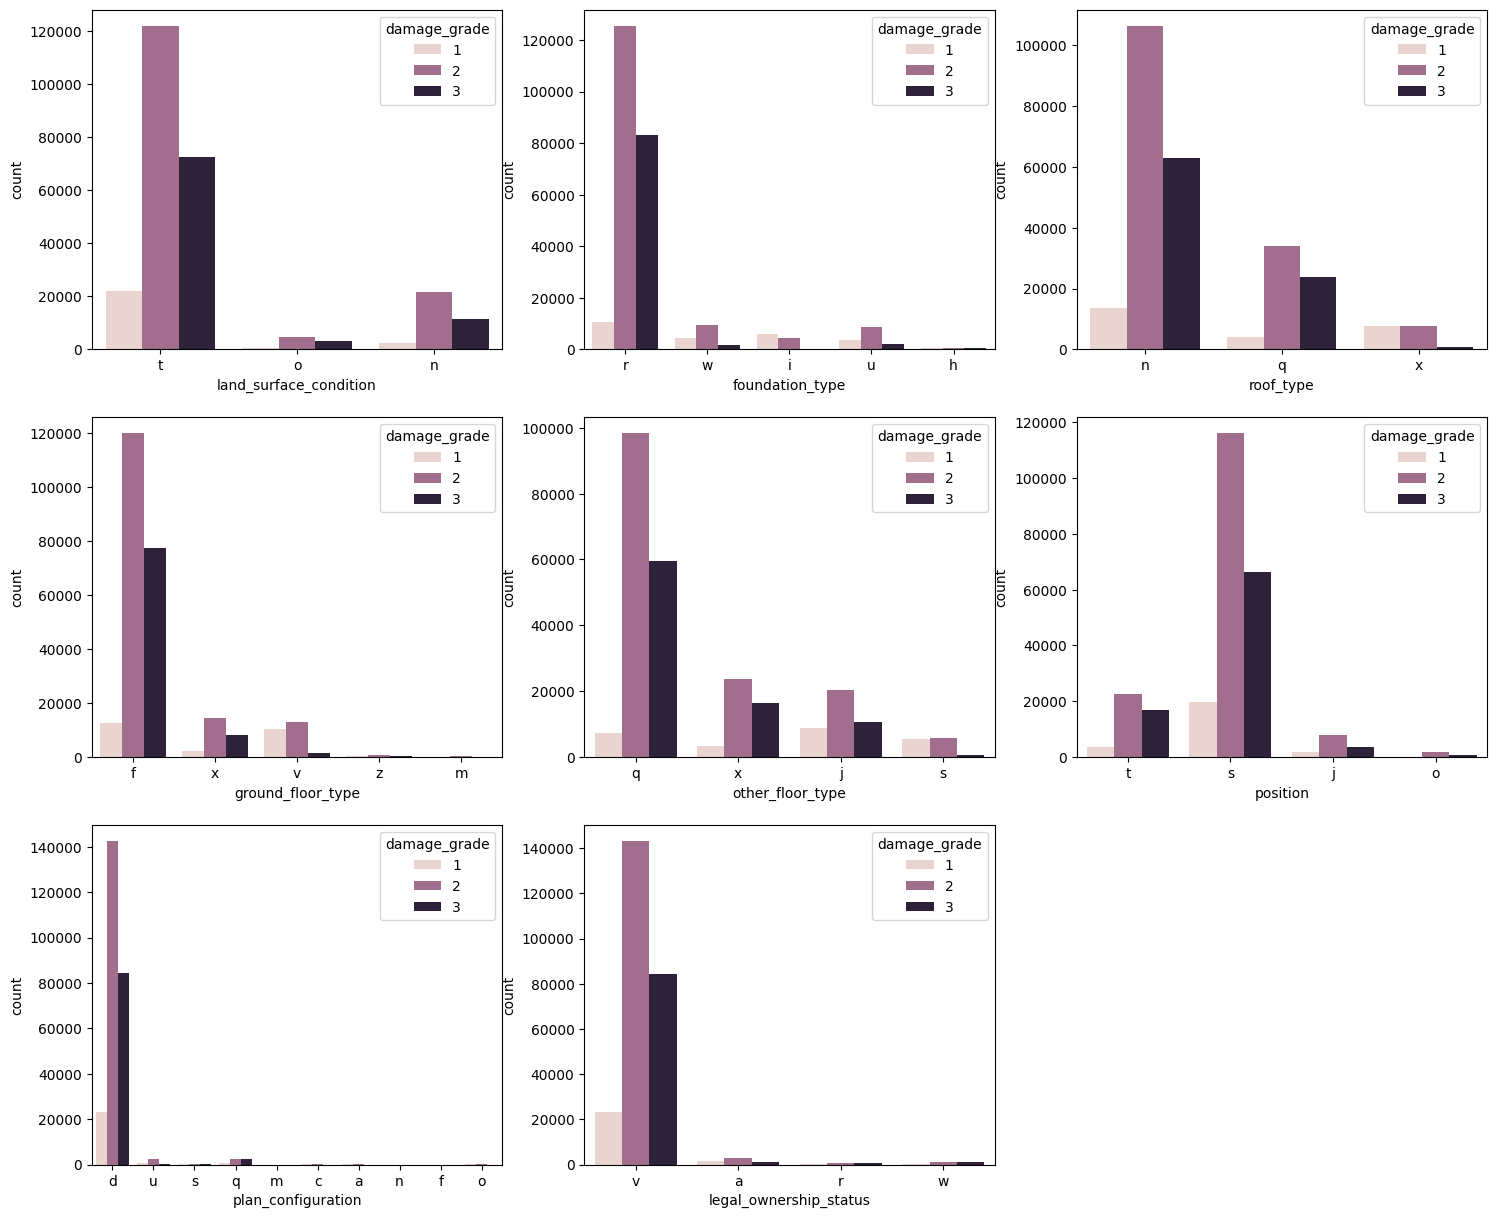

In [ ]:
cat_cols=data.select_dtypes(include=np.object).columns

plt.rcParams['font.size']=10
fig=plt.figure(figsize=(18,15))
for i,txt in enumerate(cat_cols):
  ax=fig.add_subplot(3,3,i+1)
  sns.countplot(x=data[txt],ax=ax,hue=data['damage_grade'])
plt.show()


Looking at the above plots it looks like
1. land_surface_condition with "t" value has got more damage compared to others
2. foundation_type with 'r' has got more damage compared to other values
3. roof_type with value ' n' has highest damage level
4. ground_floor_type with value 'f' has got the highest
5. other_floor_type with value 'q' has got the highest
6. position with value 's' has got the the highest damage
7. plan'_configuration with value 'd' has got the highest damage
8. legal_ownership_status with value v hads got the highest damage


**Bi-variate Analysis**

In [ ]:
num_data=data[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']]

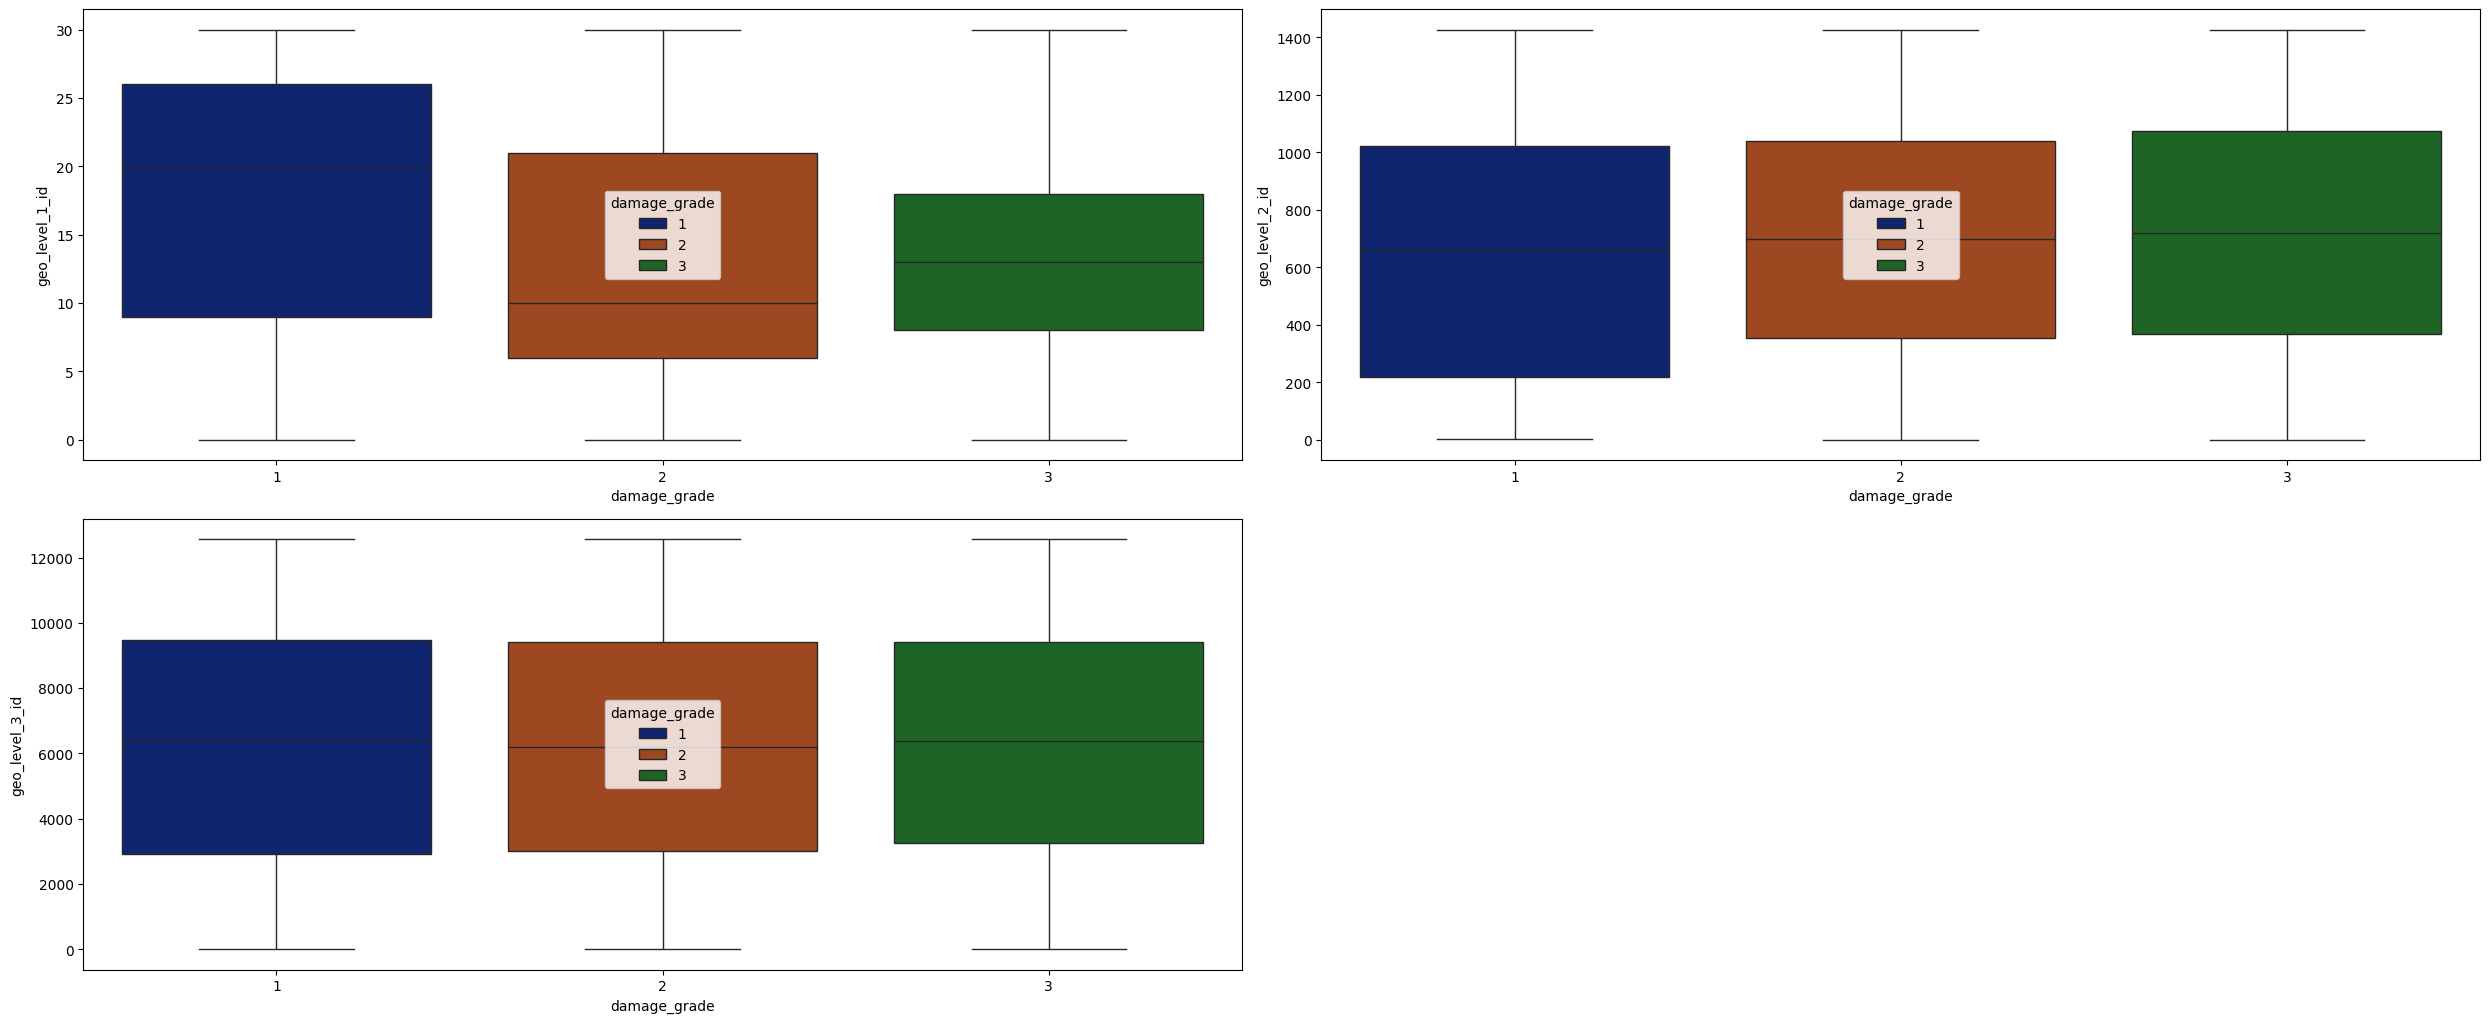

In [ ]:
# Boxplots
plt.figure(figsize=(25,15))
plot_num=1
for column in num_data:
    if plot_num<=10:
        ax=plt.subplot(3,2,plot_num)
        sns.boxplot(x=data.damage_grade,y=num_data[column],hue=data['damage_grade'],palette='dark')
    plot_num+=1
plt.tight_layout()

Insights:
* from the plot we can see most of the buildings having low level damage grade residing in the geo_level_1_id range between 9 and 26,
* also the buildings with low damage grade in geo_level_2_id residing in the range between 210 and 1100.
* Lastly the building in geo_level_3_id receive similar damage grade across all the levels.

###**Data Preprocessing**


In [ ]:
data_copy=data.copy()  # making a copy of the original data.
data_copy.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


* Check for null values

In [ ]:
data_copy.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

* check for duplicate records

In [ ]:

data_copy.duplicated().sum()

0

* Checking for Outliers

In [ ]:
num_data=data_copy.select_dtypes(include=['int','float'])  # Numerical data

In [ ]:
num_data.drop('building_id',axis=1,inplace=True)
num_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
# checking outliers in these coumns
box=data_copy[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage']]
columns=box.columns

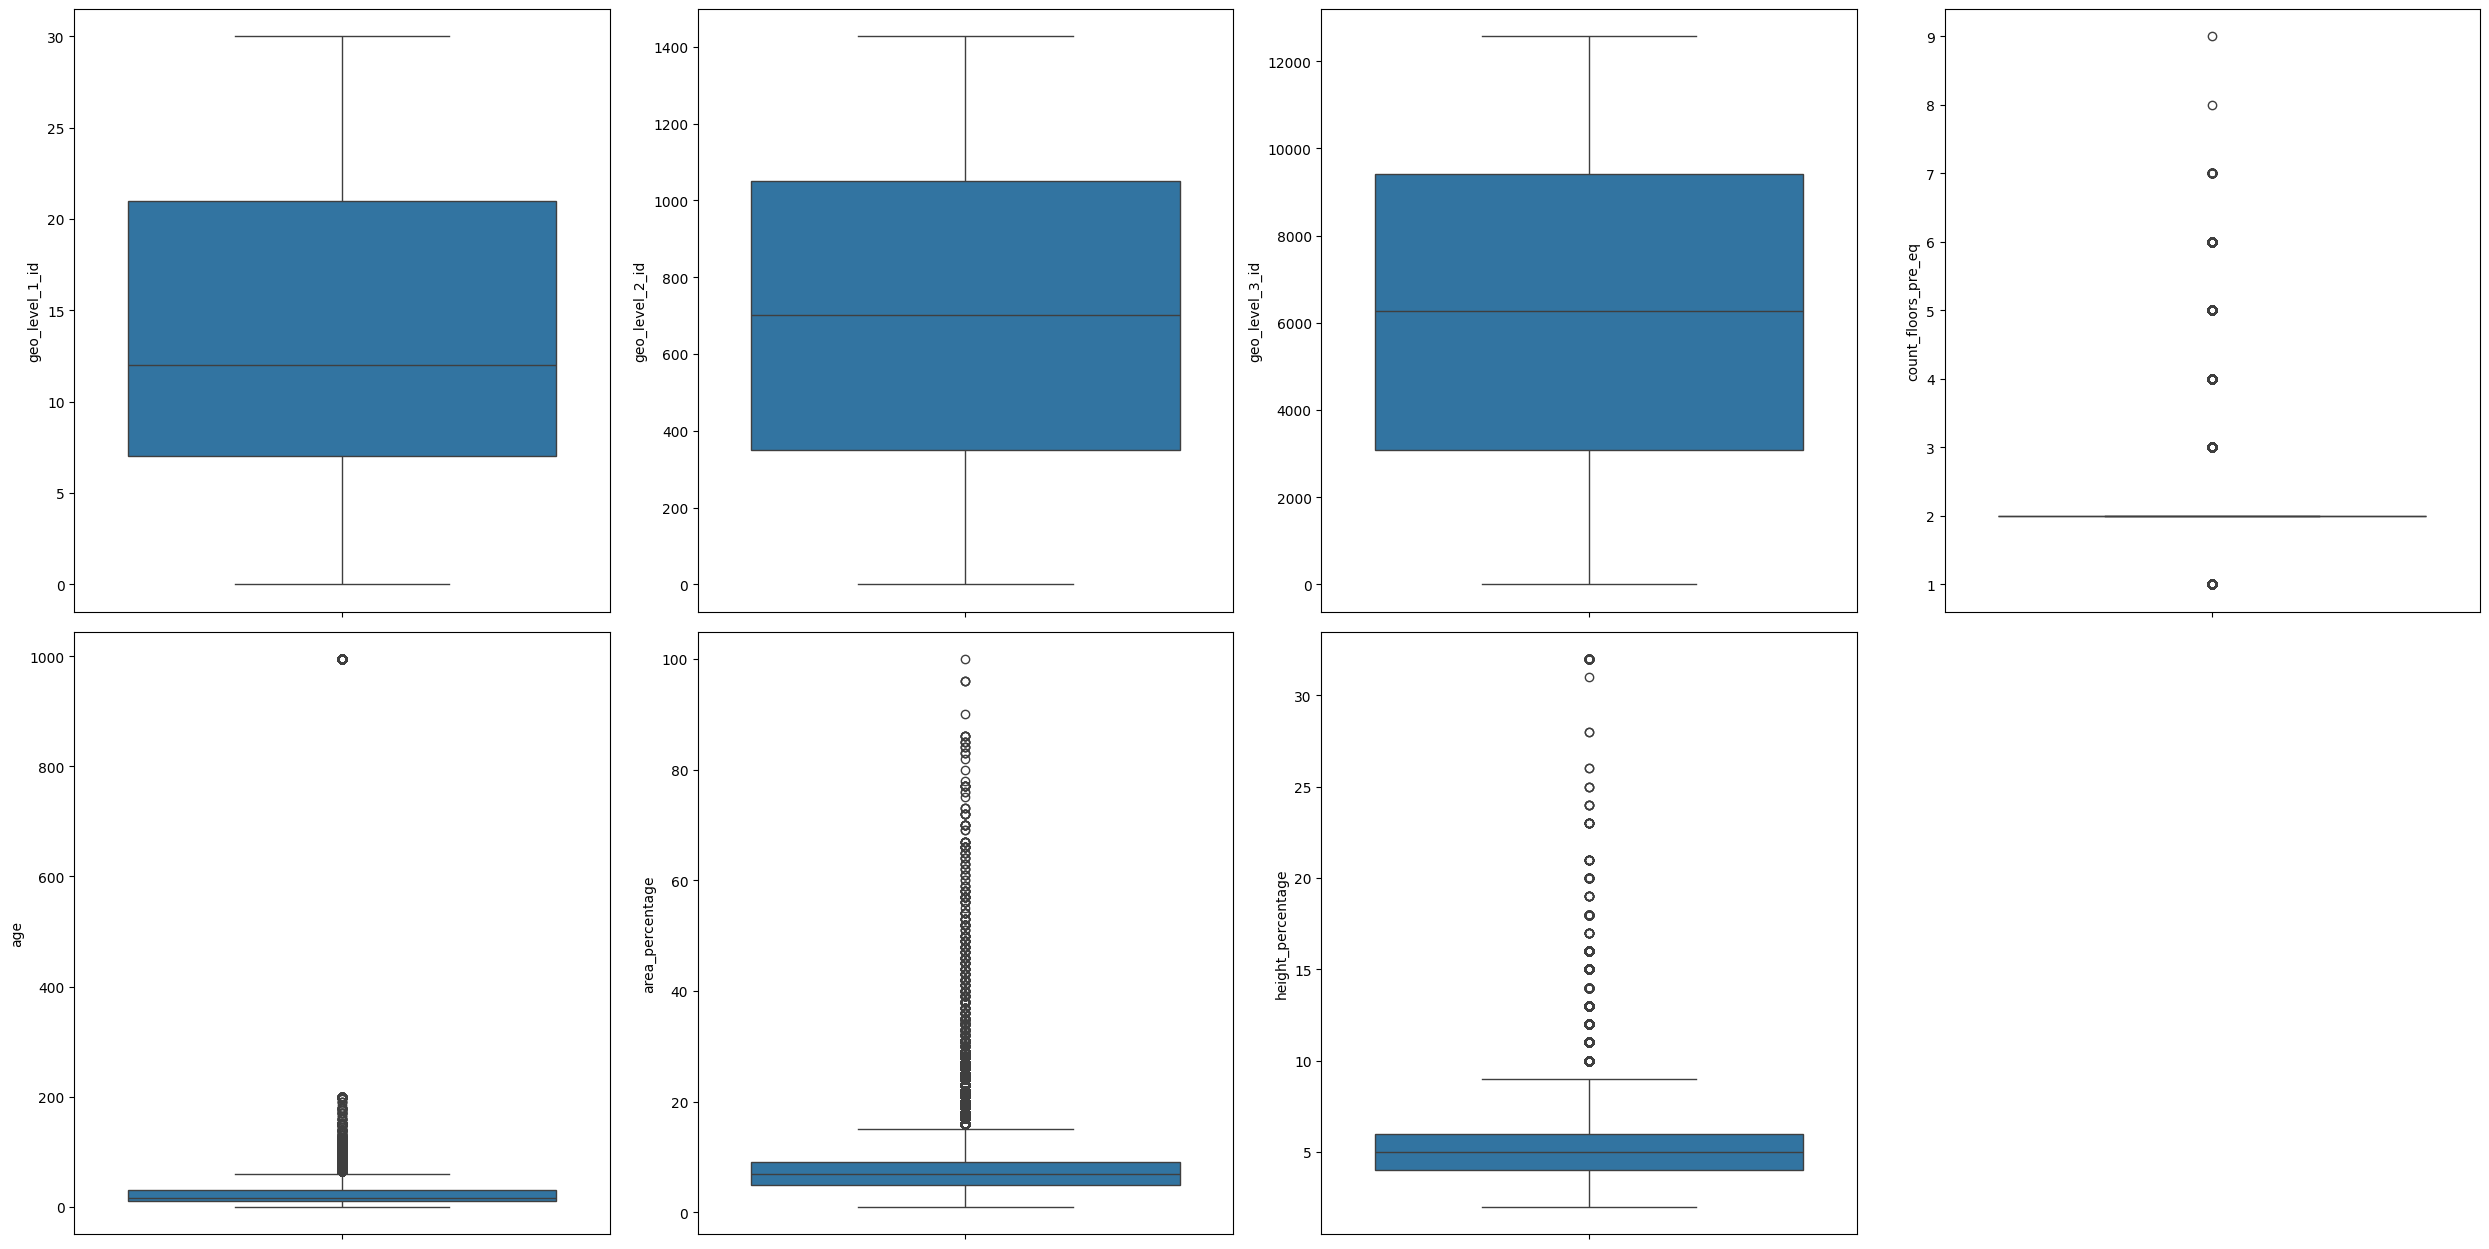

In [ ]:
# plotting boxplot from above columns
plt.figure(figsize=(25,25))
plot_num=1
for column in box:
    if plot_num<=8:
        ax=plt.subplot(4,4,plot_num)
        sns.boxplot(data=box[column])
    plot_num+=1
plt.tight_layout()

In [ ]:
# storing columns with outliers in outliers_columns variable
outliers_columns=['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage']

In [ ]:
# Function to handle Outliers
def replace_outliers_with_median(df,replace_threshold=5):
    for col in outliers_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_percentage = len(outliers) / len(df) * 100
        print(f"Column '{col}' has {outlier_percentage:.2f}% outliers.")

        if outlier_percentage <= replace_threshold:
            # Replace outliers with median value
            median_value = df[col].median()
            df[col] = df[col].mask((df[col] < lower_bound) | (df[col] > upper_bound), median_value)

    return df

In [ ]:
replace_outliers_with_median(data_copy)

Column 'geo_level_1_id' has 0.00% outliers.
Column 'geo_level_2_id' has 0.00% outliers.
Column 'geo_level_3_id' has 0.00% outliers.
Column 'count_floors_pre_eq' has 39.90% outliers.
Column 'age' has 4.80% outliers.
Column 'area_percentage' has 5.20% outliers.
Column 'height_percentage' has 3.01% outliers.


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


* Scaling of the data

In [ ]:
# scaling the data
columns=['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage']

In [ ]:
# Importing Minmax scalar.
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
data_copy[columns]=sc.fit_transform(data_copy[columns])   # scaling the values in the range of (0,1)

In [ ]:
data_copy.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,0.200000,0.341275,0.970637,0.125,0.500000,0.050505,0.428571,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,0.266667,0.630694,0.223761,0.125,0.166667,0.070707,0.714286,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,0.700000,0.254380,0.714013,0.125,0.166667,0.040404,0.428571,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,0.733333,0.292922,0.850959,0.125,0.166667,0.050505,0.428571,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,0.366667,0.091801,0.118405,0.250,0.500000,0.070707,1.000000,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


* Convert the categorical to numerical value

In [ ]:
cat_data=data_copy.select_dtypes(include='O')   #categorical data
cat_data.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,t,r,n,f,q,t,d,v
1,o,r,n,x,q,s,d,v
2,t,r,n,f,x,t,d,v
3,t,r,n,f,x,s,d,v
4,t,r,n,f,x,s,d,v


In [ ]:
# printing value counts and unique categories of each categorical column.
for col in cat_data:
    print(col,data[col].unique())
    print(data[col].value_counts())
    print('---------------------------')

land_surface_condition ['t' 'o' 'n']
t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64
---------------------------
foundation_type ['r' 'w' 'i' 'u' 'h']
r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64
---------------------------
roof_type ['n' 'q' 'x']
n    182842
q     61576
x     16183
Name: roof_type, dtype: int64
---------------------------
ground_floor_type ['f' 'x' 'v' 'z' 'm']
f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64
---------------------------
other_floor_type ['q' 'x' 'j' 's']
q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64
---------------------------
position ['t' 's' 'j' 'o']
s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64
---------------------------
plan_configuration ['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']
d    250072
q      5692
u      3649
s       346
c       325
a       2

* Label Encoding

In [ ]:
# using one Hot encoding for these columns
one_hot_enc_columns=['land_surface_condition','roof_type']

In [ ]:
# Creating dummy variables.
df_encoded = pd.get_dummies(data=data_copy[one_hot_enc_columns],drop_first=True,dtype=int)
data1=pd.concat([data_copy,df_encoded],axis=1).drop(one_hot_enc_columns,axis=1) # concating dummies with the data and creating a new dataframe.

In [ ]:
data1.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,foundation_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition_o,land_surface_condition_t,roof_type_q,roof_type_x
0,802906,0.200000,0.341275,0.970637,0.125,0.500000,0.050505,0.428571,r,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0
1,28830,0.266667,0.630694,0.223761,0.125,0.166667,0.070707,0.714286,r,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0
2,94947,0.700000,0.254380,0.714013,0.125,0.166667,0.040404,0.428571,r,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0
3,590882,0.733333,0.292922,0.850959,0.125,0.166667,0.050505,0.428571,r,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0
4,201944,0.366667,0.091801,0.118405,0.250,0.500000,0.070707,1.000000,r,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0


In [ ]:
# Label encoding below columns
lc_cols=['foundation_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']

In [ ]:
# Importing the label encoder
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
for col in lc_cols:
  data1[col]=lc.fit_transform(data1[col])

In [ ]:
data1.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,foundation_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition_o,land_surface_condition_t,roof_type_q,roof_type_x
0,802906,0.200000,0.341275,0.970637,0.125,0.500000,0.050505,0.428571,2,0,1,3,2,1,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0
1,28830,0.266667,0.630694,0.223761,0.125,0.166667,0.070707,0.714286,2,3,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0
2,94947,0.700000,0.254380,0.714013,0.125,0.166667,0.040404,0.428571,2,0,3,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0
3,590882,0.733333,0.292922,0.850959,0.125,0.166667,0.050505,0.428571,2,0,3,2,2,0,1,0,0,0,0,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0
4,201944,0.366667,0.091801,0.118405,0.250,0.500000,0.070707,1.000000,2,0,3,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0


###**Feature Engineering**

In [ ]:
# Dropping the ID column
df1=data1.drop('building_id',axis=1)

<Axes: >

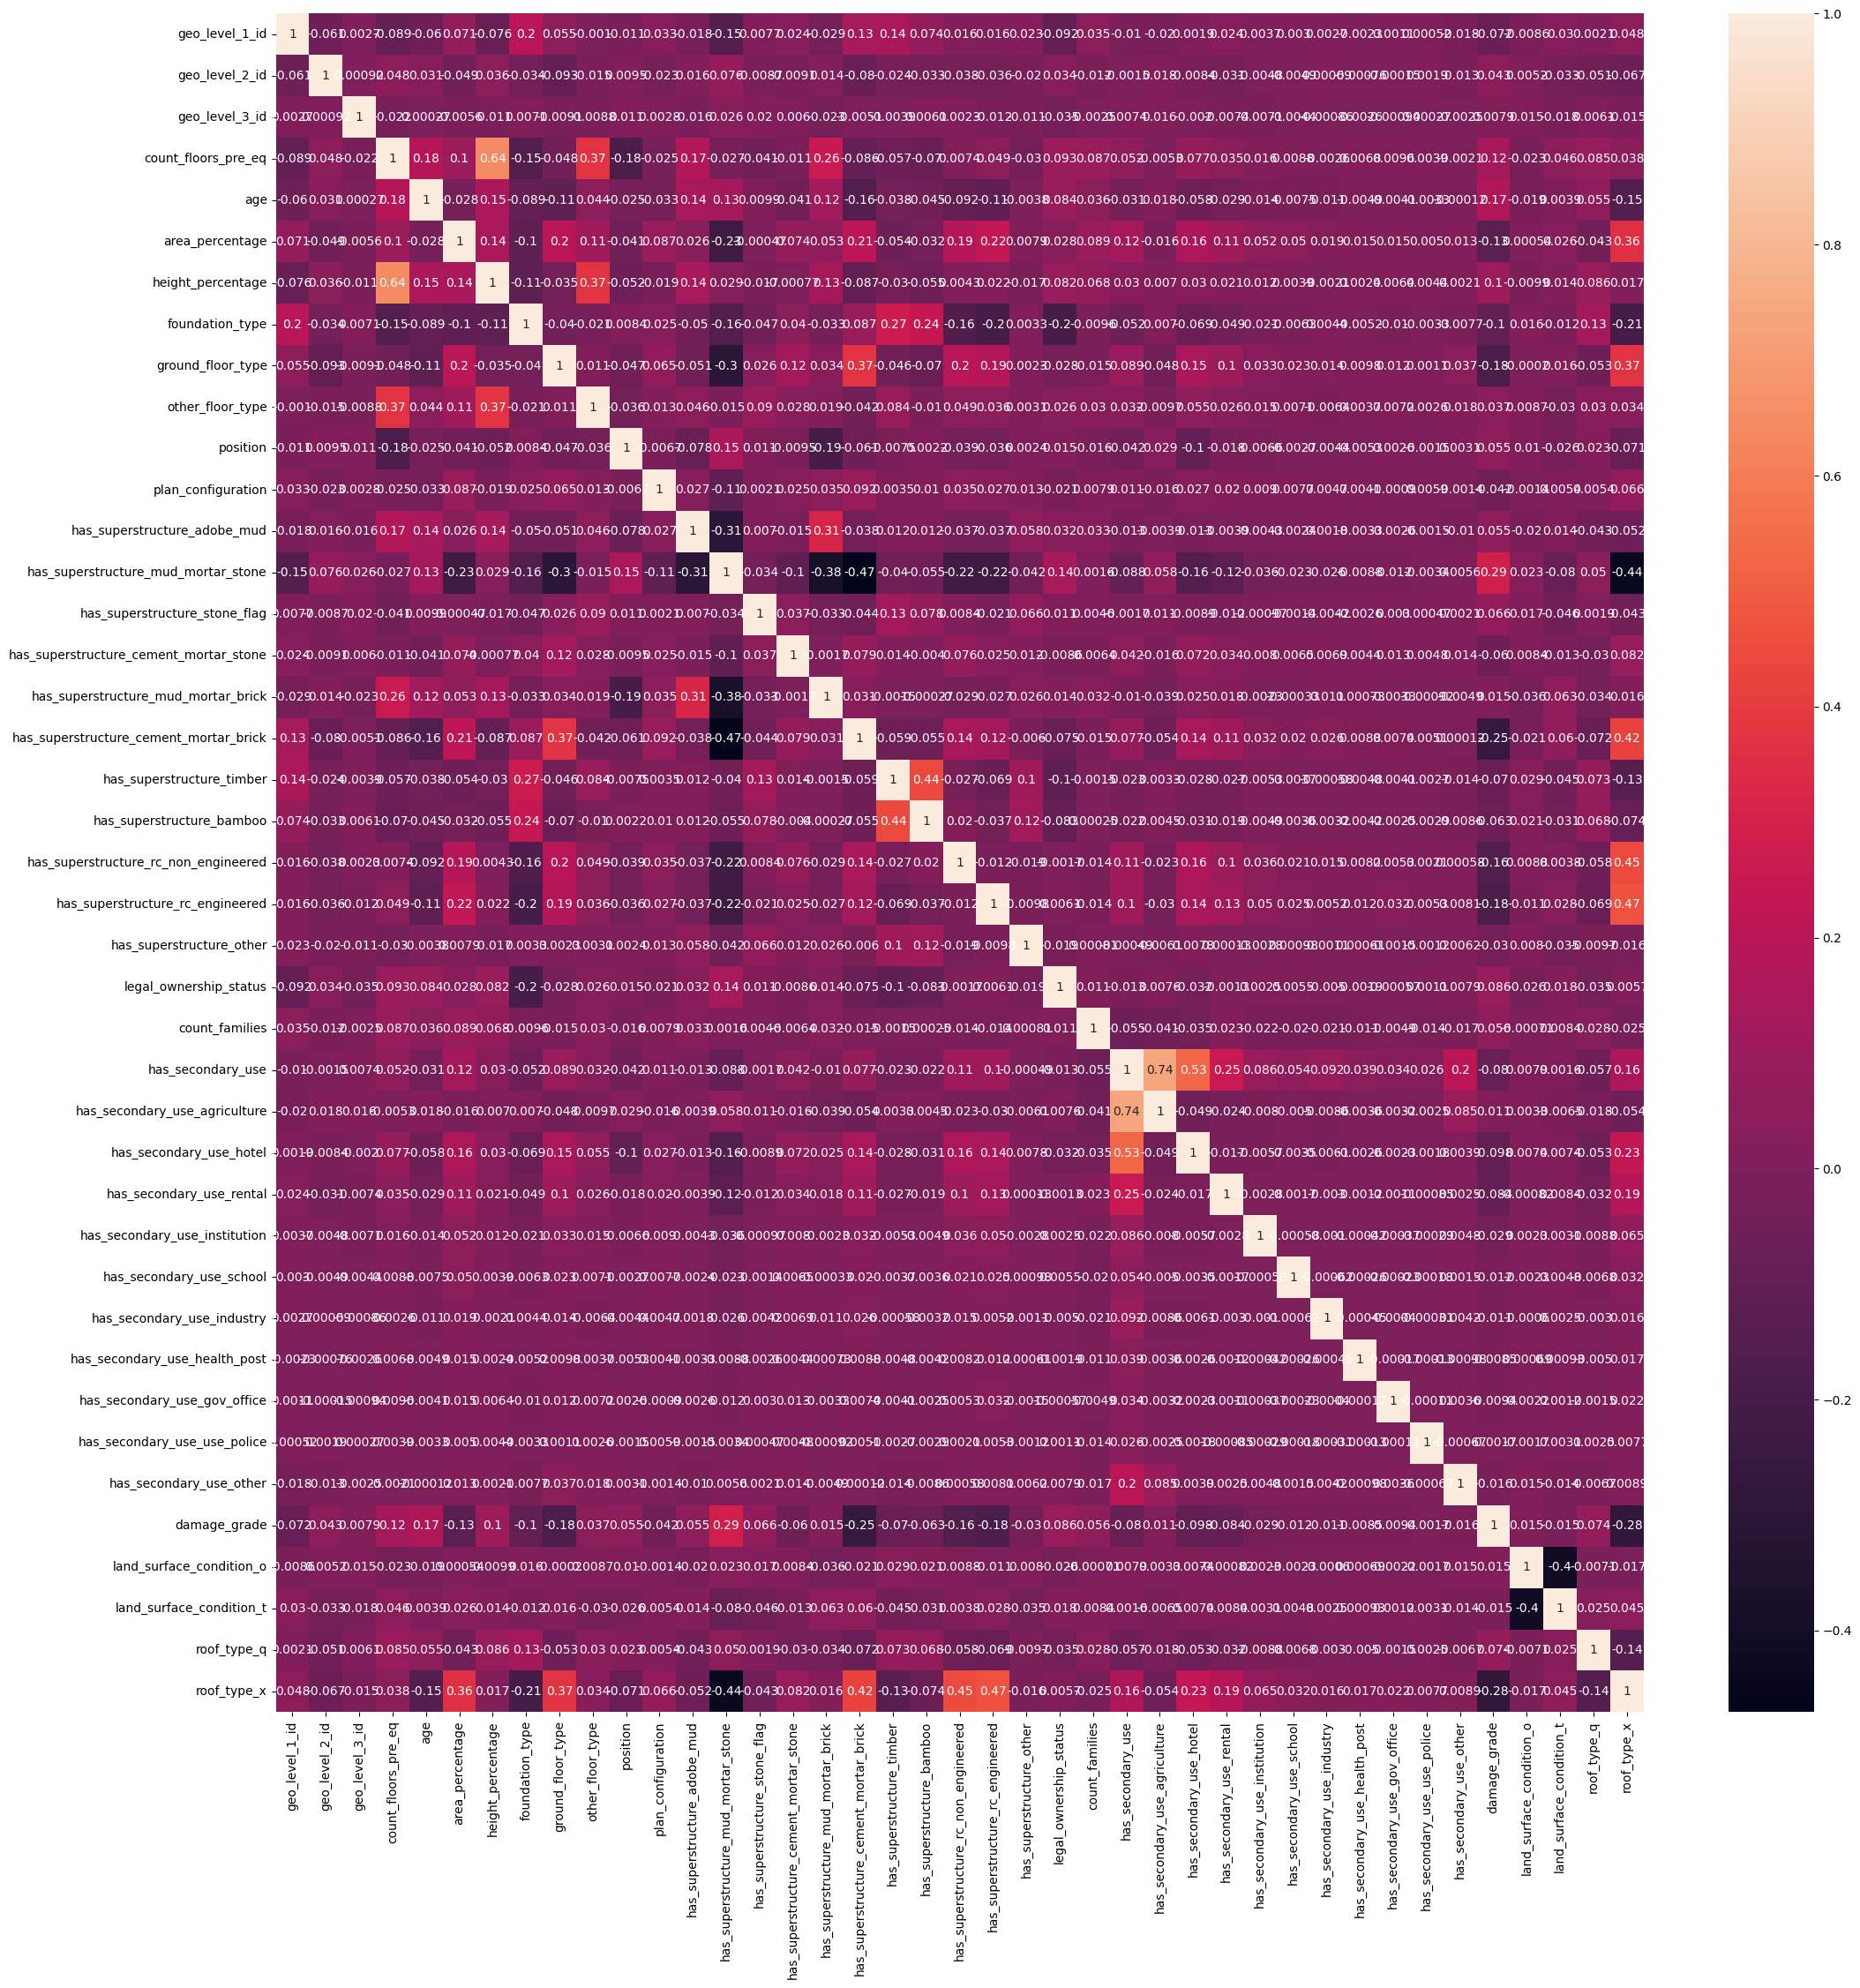

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df1.corr(),annot=True)

In [ ]:
# writing a function to find the muliti collinearity between independent variables
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
correlation(df1,0.85)  # setting the threshold as 0.85

set()

###**Model Creation**

Splitting the data to independent and dependent variables

In [ ]:
# Splitting the data into train and test
x=df1.drop('damage_grade',axis=1)
y=df1.damage_grade

In [ ]:
#splitting the data to training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
x_train.shape

(182420, 40)

In [ ]:
x_test.shape

(78181, 40)

**Apply Balancing Data**

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()   # using smote technique to balance the data

In [ ]:
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [ ]:
x_smote.shape

(311457, 40)

In [ ]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))        #data is balanced

Actual Classes Counter({2: 103819, 3: 60958, 1: 17643})
SMOTE Classes Counter({3: 103819, 2: 103819, 1: 103819})


### **Model Building**

**Apply a base model**

In [ ]:
from sklearn.metrics import f1_score
def check_model_f1_score(model):
  model.fit(x_smote,y_smote)
  test_y_pred=model.predict(x_test)
  return f1_score(y_test, test_y_pred,average='micro')

**Apply Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='multinomial')
lr_score=check_model_f1_score(lr)
print("Basic Logistic Regression model:",lr_score)

Basic Logistic Regression model: 0.4826620278584311


**Apply Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc_score=check_model_f1_score(dc)
print("Decision Tree Classifer model:",dc_score)

Decision Tree Classifer model: 0.6458602473746818


**Apply Random forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc_score=check_model_f1_score(rc)
print("Random forest classifer model:",rc_score)



Random forest classifer model: 0.705324823166754


In [ ]:
#find the training score
rc.score(x_smote,y_smote)

0.9926217744343521

In [ ]:
# Testing Score
rc.score(x_test,y_test)

0.705324823166754

**Apply Hyper parameter tuning for Random Forest classifier**

In [ ]:
# Features for Random forest
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]       # Parameters of Random forest
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


In [ ]:
# Taking sample data for hyper parameter tuning
x=x.iloc[:10000,]
y=y.iloc[:10000,]
x.shape,y.shape

((10000, 40), (10000,))

In [ ]:
#Dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x, y)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False})


In [ ]:
## Fitting the model with Best params

In [ ]:
rf1=RandomForestClassifier(n_estimators=600,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',
                          max_depth=40,bootstrap=False)

In [ ]:
rf1.fit(x_smote,y_smote)

RandomForestClassifier(bootstrap=False, max_depth=40, min_samples_split=10,
                       n_estimators=600)

In [ ]:
# Training Score
rf1.score(x_smote,y_smote)

0.9712737231784805

In [ ]:
# Testing score
rf_score=rf1.score(x_test,y_test)

**Apply XGB Classifier**

In [ ]:
# Importing the model
from xgboost import XGBClassifier
xg=XGBClassifier()

In [ ]:
x_smote.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,foundation_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_o,land_surface_condition_t,roof_type_q,roof_type_x
0,0.533333,0.709180,0.885653,0.125,0.416667,0.050505,0.428571,2,3,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0.100000,0.971969,0.073605,0.500,0.250000,0.101010,0.428571,2,3,1,1,2,0,0,0,0,1,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.866667,0.735809,0.552001,0.125,0.333333,0.060606,0.428571,3,2,3,2,2,0,0,0,0,0,1,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.266667,0.324457,0.373359,0.125,0.166667,0.161616,0.571429,2,0,1,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.433333,0.548704,0.603406,0.125,0.166667,0.040404,0.285714,2,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()                                      # Label Encoding the target variable as per the requirment of XGB
y_smote=pd.DataFrame(lc.fit_transform(y_smote))

In [ ]:
y_smote.value_counts()

0    103819
1    103819
2    103819
dtype: int64

In [ ]:
xg.fit(x_smote,y_smote)  # Fitting the data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Training Score
xg.score(x_smote,y_smote)

0.805411340891359

In [ ]:
# Label encdoing the test target
y_test=pd.DataFrame(lc.fit_transform(y_test))

In [ ]:
# Testing Accuarcy
xg.score(x_test,y_test)

0.7133446745372917

In [ ]:
y=pd.DataFrame(lc.fit_transform(y))  # label encoding the target

**Hyper parameter tuning for XGB Classsifier**

In [ ]:
# Importing Randomized search cv to hypertune parameters
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_estimators': [100, 200, 300],
                'max_depth': [3, 4, 5],
                'learning_rate': [0.01, 0.1, 0.3],
                'subsample': [0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0],
                'min_child_weight': [1, 5, 10],
                'reg_alpha': [0, 0.1, 1],
                'reg_lambda': [0, 0.1, 1],
                'scale_pos_weight': [1, 2, 5]}
xg=XGBClassifier(random_state=10,verbosity=0)
rcv=RandomizedSearchCV(estimator=xg,param_distributions=param_grid,n_iter=100,cv=3,verbose=1,random_state=11,n_jobs=-1,
                       scoring='accuracy',return_train_score=False)

rcv.fit(x,y)
rcv.best_score_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


0.685199083795602

In [ ]:
rcv.best_params_  # Best params

In [ ]:
# Fitting the model with best params
xg1=XGBClassifier(subsample=0.9,scale_pos_weight=5,reg_lambda=1,reg_alpha=0.1,n_estimators=300,min_child_weight=5,
                  max_depth=5,learning_rate=0.3,colsample_bytree=0.8)

In [ ]:
xg1.fit(x_smote,y_smote) # Training the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xg1.score(x_smote,y_smote)  # Training Accuracy

0.8214552891731443

In [ ]:
xg_score=xg1.score(x_test,y_test)   # Testing Accuracy

In [ ]:
y_pred=xg1.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 3964,  3434,    83],
       [ 2103, 36732,  5605],
       [  180,  9858, 16222]])

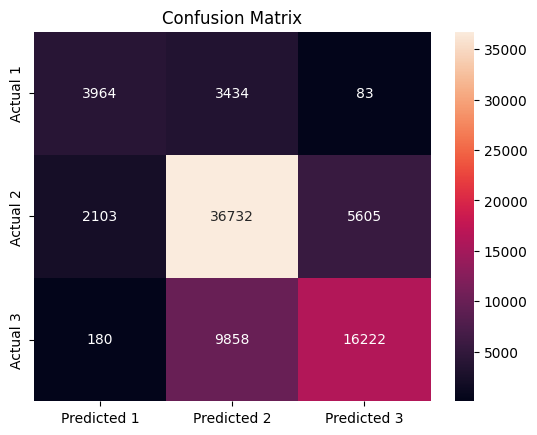

In [ ]:
# Display the confusion matrix using Seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Predicted 1', 'Predicted 2','Predicted 3'],
            yticklabels=['Actual 1', 'Actual 2','Actual 3'])
plt.title('Confusion Matrix')
plt.show()

**ANN Model**

In [ ]:
# Importing keras and sequentional model
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization  # importing the libraries

In [ ]:
# Building the model
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=40))
model.add(BatchNormalization())


model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())


model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(3,activation='softmax'))


In [ ]:
model.summary()  # Summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_2 (Bat  (None, 64)                2

In [ ]:
y_smote.shape # checking the shape

(311457, 1)

In [ ]:
y_smote=lc.fit_transform(y_smote)  # Encoding the target

In [ ]:
y_sm=keras.utils.to_categorical(y_smote)

In [ ]:
y_sm.shape

(311457, 3)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_smote, y_sm, epochs=50, batch_size=128, verbose=1)  # Training the model

Epoch 1/50
2434/2434 [==============================] - 24s 7ms/step - loss: 0.8395 - accuracy: 0.5954
Epoch 2/50
2434/2434 [==============================] - 18s 7ms/step - loss: 0.7724 - accuracy: 0.6357
Epoch 3/50
2434/2434 [==============================] - 17s 7ms/step - loss: 0.7504 - accuracy: 0.6496
Epoch 4/50
2434/2434 [==============================] - 17s 7ms/step - loss: 0.7371 - accuracy: 0.6575
Epoch 5/50
2434/2434 [==============================] - 18s 7ms/step - loss: 0.7275 - accuracy: 0.6633
Epoch 6/50
2434/2434 [==============================] - 17s 7ms/step - loss: 0.7172 - accuracy: 0.6692
Epoch 7/50
2434/2434 [==============================] - 18s 7ms/step - loss: 0.7094 - accuracy: 0.6742
Epoch 8/50
2434/2434 [==============================] - 17s 7ms/step - loss: 0.7014 - accuracy: 0.6779
Epoch 9/50
2434/2434 [==============================] - 18s 7ms/step - loss: 0.6968 - accuracy: 0.6813
Epoch 10/50
2434/2434 [==============================] - 18s 7ms/step - l

In [ ]:
y_test=lc.fit_transform(y_test)
y_sm=keras.utils.to_categorical(y_test)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_sm)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")   # Testing the model
ann_score=accuracy

2444/2444 [==============================] - 10s 4ms/step - loss: 0.7923 - accuracy: 0.6272
Test Loss: 0.7923, Test Accuracy: 0.6272


**ANN model**
* Training accuracy is 77%
* Testing accuracy is 61%

**Apply KNeighbour Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate the KNeighborsClassifier with, for example, k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn_score=check_model_f1_score(knn)
print("KNeighbour model:",knn_score)


KNeighbour model: 0.5800770008058224


###**Plot graph for model comparision**

Text(0.5, 1.0, 'Model comparision on Test F1 score')

<Figure size 800x600 with 0 Axes>

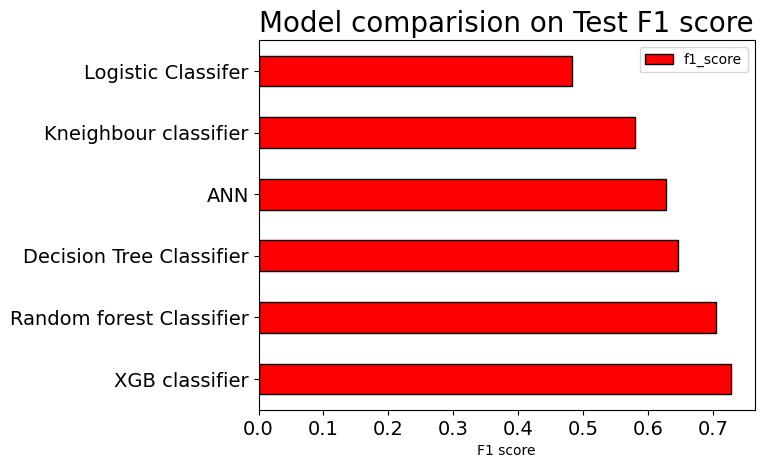

In [ ]:
plt.figure(figsize=(8,6))
model_comparison=pd.DataFrame({'model':['Logistic Classifer','Decision Tree Classifier',
                                         'Random forest Classifier','XGB classifier','ANN','Kneighbour classifier'],
                                'f1_score':[lr_score,dc_score,rc_score,xg_score,ann_score,knn_score]})
#Create a horizontal bar chart
model_comparison.sort_values('f1_score',ascending=False).plot(x='model',y='f1_score',kind='barh',
                                                              color='red',edgecolor='black')
#Plot formatting
plt.ylabel(''); plt.yticks(size=14);plt.xlabel('F1 score'); plt.xticks(size=14)
plt.title('Model comparision on Test F1 score',size=20)

**<U>Model Comparision Report</U>**
> We have tried with  different classifications models such as Random forest,ANN and XGB Classifier among which XGB classifier is giving better performance when compared to other models with <mark>accuarcy of about 72%</mark>.





### **Report On Challenges Faced**

* Merging dataframes : As the data containing features and Target where in seperate files we have merged them into a single dataframe using 'Buliding_id' for ease of visualization and model building.
* Outliers Handling : we had outliers in few columns such as [age,count floors per eq,area percentage and height percentage] and the outliers which are  less than 5% were handled by imputing with median values.
* Scaling the data : The data we had contains values in different scale so the data is scaled using MinMax scaler to bring all the data into the scale of 0 to 1.
* Encoding categorical features : The categorical features having less than three categories where handled using One Hot Encoding the remaining categorical features were converted into numerical using label encoder.
* Splitting the data : we have splitted the data into train and test values for evaluating the model.
* Balancing the data : The data containing the target feature has unequal data classes we have used SMOTE technique to balance the data classes in the target to avoid misclassifications.
* Hyper parameter Tuning : After making predictions using different classification models the accuracies very quite low so we tried tuning their parametrs using Randomized SearchCv to improve the model performance.As the data was so huge and taking quite a long time for training a subset of the data was used for tuning the parameters.

## **TASK3**



> <u>**Suggestions to the Seismologists to avoid  earthquake event leading  to significant damage in many buildings**</u>
* Looking at the above data , it is suggested to construct quake-resistent building, this will help in making sure buildings will withstand earthquakes to save lives and to prevent injuries
* looking at the univariate analysis it appears that
  * one of the graph has structure made up of mud motar stone has high level damage grade at all levels
  * has_superstructure_timber: has mediam level of damage at all 3 grades
  * has_superstructure_bamboo: usage of bamboo in construction has low level of damage.   
* **It is suggested to use less of mud motar stone for construction and to contstruct more traditional homes**
* Age of the construction matters for reducing the damage_grade,
we have buildings with minimum age of 0 and maximum of 995 and most of the bulidings are in the age group of 0 to 30.
   * People should be evacuated, and the builings which are in the age group of 20-30, should be used for other purposes, like warehouse, etc which reduce the lose lives and injuries to people.
  * Building which have more age can be constantly monitored for further repair or maintenance.
  * If possible changing the roof type should also contribute to less damage.


